In [13]:
from __future__ import division
from keras.layers import Input, Activation, Dense, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers.merge import add
from keras.regularizers import l2
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil

In [14]:
input_layer = Input(shape=(64,64,3))
conv1_1 = Conv2D(filters=64,kernel_size=(7,7),strides=(3,3), kernel_initializer="he_normal",kernel_regularizer=l2(1e-4))(input_layer)
batchNormal1 = BatchNormalization(axis=3)(conv1_1)
activation1 = Activation('relu')(batchNormal1)
mp2d1 = MaxPooling2D((3,3),strides=(2,2), padding="same")(activation1)

conv2_1 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(mp2d1)
batchNormal2 = BatchNormalization(axis = 3)(conv2_1)
activation2 = Activation('relu')(batchNormal2)
conv2_2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(activation2)

res1_batchNormal1_1 = BatchNormalization(axis = 3)(mp2d1)
res1_relu1_1 = Activation('relu')(res1_batchNormal1_1)
res1_conv1_1 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(res1_relu1_1)
res1_batchNormal1_2 = BatchNormalization(axis = 3)(res1_conv1_1)
res1_relu1_2 = Activation('relu')(res1_batchNormal1_2)
res1_conv1_2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(res1_relu1_2)

input_shape = K.int_shape(conv2_2)
residual_shape = K.int_shape(res1_conv1_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv2_2
if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block1 = add([shortcut, res1_conv1_2])
#model = Model(inputs=input_layer, outputs=block1)
#model.summary()
#input_layer 와 1번째 residual block

In [15]:


conv3_1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same")(block1)
batchNormal3 = BatchNormalization(axis = 3)(conv3_1)
activation3 = Activation('relu')(batchNormal3)
conv3_2 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same")(activation3)

res2_batchNormal2_1 = BatchNormalization(axis = 3)(block1)
res2_relu2_1 = Activation('relu')(res2_batchNormal2_1)
res2_conv2_1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same")(res2_relu2_1)
res2_batchNormal2_2 = BatchNormalization(axis = 3)(res2_conv2_1)
res2_relu2_2 = Activation('relu')(res2_batchNormal2_2)
res2_conv2_2 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same")(res2_relu2_2)

input_shape = K.int_shape(conv3_2)
residual_shape = K.int_shape(res2_conv2_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv3_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block2 = add([shortcut, res2_conv2_2])

#model = Model(inputs=input_layer, outputs=block2)
#model.summary()
#2번째 residual block

In [16]:

conv4_1 = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same")(block2)
batchNormal4 = BatchNormalization(axis = 3)(conv4_1)
activation4 = Activation('relu')(batchNormal4)
conv4_2 = Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same")(activation4)

res3_batchNormal3_1 = BatchNormalization(axis = 3)(block2)
res3_relu3_1 = Activation('relu')(res3_batchNormal3_1)
res3_conv3_1 = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same")(res3_relu3_1)
res3_batchNormal3_2 = BatchNormalization(axis = 3)(res3_conv3_1)
res3_relu3_2 = Activation('relu')(res3_batchNormal3_2)
res3_conv3_2 = Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same")(res3_relu3_2)

input_shape = K.int_shape(conv4_2)
residual_shape = K.int_shape(res3_conv3_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv4_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block3 = add([shortcut, res3_conv3_2])

#model = Model(inputs=input_layer, outputs=block3)
#model.summary()
#3번째 residual block

In [17]:

conv5_1 = Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same")(block3)
batchNormal5 = BatchNormalization(axis = 3)(conv5_1)
activation5 = Activation('relu')(batchNormal5)
conv5_2 = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same")(activation5)

res4_batchNormal4_1 = BatchNormalization(axis = 3)(block3)
res4_relu4_1 = Activation('relu')(res4_batchNormal4_1)
res4_conv4_1 = Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same")(res4_relu4_1)
res4_batchNormal4_2 = BatchNormalization(axis = 3)(res4_conv4_1)
res4_relu4_2 = Activation('relu')(res4_batchNormal4_2)
res4_conv4_2 = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same")(res4_relu4_2)

input_shape = K.int_shape(conv5_2)
residual_shape = K.int_shape(res3_conv3_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv5_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

final_block = add([shortcut, res4_conv4_2])

#model = Model(inputs=input_layer, outputs=final_block)
#model.summary()
#4번째 마지막 residual block

In [18]:
batchNormal6 = BatchNormalization(axis = 3)(final_block)
activation6 = Activation('relu')(batchNormal6)

last_shape = K.int_shape(activation6)
avg_p_2d = AveragePooling2D(pool_size = (last_shape[1],last_shape[2]), strides=(1,1))(activation6)
flatten = Flatten()(avg_p_2d)
dense = Dense(units = 256, kernel_initializer="he_normal", activation="relu")(flatten)
dense2 = Dense(units = 128, activation="relu")(dense)
dense3 = Dense(units = 1, activation="sigmoid")(dense2)
model = Model(inputs=input_layer, outputs=dense3)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 20, 20, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 20, 20, 64)   256         conv2d_18[0][0]                  
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 20, 20, 64)   0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

In [19]:
model.load_weights("19_try_2class.h5")

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

[[0.8729918]]


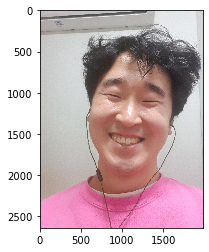

[[0.02929042]]


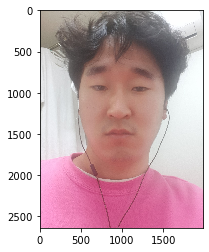

In [32]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('me.jpg', cv2.IMREAD_COLOR)
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

img3 = cv2.imread('me2.jpg', cv2.IMREAD_COLOR)
b,g,r = cv2.split(img3)
img3 = cv2.merge([r,g,b])

img2 = img
img4 = img3

img = cv2.resize(img, dsize=(64,64), interpolation = cv2.INTER_AREA)
img = img.astype('float32')/255
img = img.reshape((1,64,64,3))

img3 = cv2.resize(img3, dsize=(64,64), interpolation = cv2.INTER_AREA)
img3 = img3.astype('float32')/255
img3 = img3.reshape((1,64,64,3))

result1 = model.predict(img)
result2 = model.predict(img3)

plt.imshow(img2)
print(result1)
plt.show()
plt.imshow(img4)
print(result2)
plt.show()




In [26]:
import cv2,os,sys

train_vali_test = os.listdir('img/navi_img')

flag = 1
blk_size = 9
C = 5
"""
filelist = []
filelist = ['ParkMyungSoo', 'ParkHyeiSoon', 'OhDalSoo','YouHaeJin', 'JungJunHa' ,'JoSaeHo', 'JoHoMin']
"""
# 파일 순서대로 파일 안에있는 이미지 이름 가져옴.
for folders in train_vali_test : #train..validation, test..
    folderlist = os.listdir('img/navi_img/'+folders)
    
    for classes in folderlist : #class.. ex) sad, smile. normal..
        clsseslist = os.listdir('img/navi_img/'+folders+'/'+classes)

    
    #이미지를 순서대로 가져와서 얼굴 인식.
        for imglists in clsseslist : #image

            img = cv2.imread('img/navi_img/'+folders+'/'+classes+'/'+imglists, cv2.IMREAD_COLOR)
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])

            img = cv2.resize(img, dsize=(64,64), interpolation = cv2.INTER_AREA)
            img = img.astype('float32')/255
            img = img.reshape((1,64,64,3))

            result = model.predict(img)
            #65퍼가 왠만한 웃는 사진은 다 걸러옴.
            if result > 0.65:
                shutil.copy('img/navi_img/'+folders+'/'+classes+'/'+imglists,
                            'img/navi_smile_delete/'+folders+'/'+classes+'/'+imglists)
                print(imglists)
           
           
        #resizing_img = cv2.resize(img, dsize=(64,64), interpolation = cv2.INTER_AREA)
        #    cv2.imwrite('img/navi_64_gray/'+folders+'/'+classes+'/'+imglists, resizing_img)


angface6_1_angerpeople164.jpg
angface6_1_angerpeople165.jpg
angface6_1_angerpeople172.jpg
angface6_1_angerpeople192.jpg
angface6_1_angerpeople222.jpg
angface6_1_angerpeople223.jpg
angface6_1_angerpeople224.jpg
angface6_1_angerpeople226.jpg
angface6_1_angerpeople236.jpg
angface6_1_angerpeople242.jpg
angface6_1_angerpeople243.jpg
angface6_1_angerpeople252.jpg
angface6_1_angerpeople253.jpg
angface6_1_angerpeople254.jpg
angface6_1_angerpeople255.jpg
angface6_1_angerpeople259.jpg
angface6_1_angerpeople264.jpg
angface6_1_angerpeople275.jpg
angface6_1_angerpeople281.jpg
angface6_1_angerpeople290.jpg
angface6_1_angerpeople296.jpg
angface6_1_angerpeople304.jpg
angface6_1_angerpeople336.jpg
angface6_1_angerpeople344.jpg
angface6_1_angerpeople356.jpg
angface6_1_angerpeople362.jpg
angface6_1_angerpeople364.jpg
angface6_1_angerpeople366.jpg
angface6_1_angerpeople369.jpg
angface6_1_angerpeople373.jpg
angface6_1_angerpeople382.jpg
angface6_1_angerpeople401.jpg
angface6_1_angerpeople418.jpg
angface6_1

smile3_1_smile3521.jpg
smile3_1_smile3524.jpg
smile3_1_smile3525.jpg
angface2_1_angryperson0.jpg
angface2_1_angryperson1.jpg
angface2_1_angryperson10.jpg
angface2_1_angryperson100.jpg
angface2_1_angryperson106.jpg
angface2_1_angryperson107.jpg
angface2_1_angryperson110.jpg
angface2_1_angryperson112.jpg
angface2_1_angryperson114.jpg
angface2_1_angryperson116.jpg
angface2_1_angryperson119.jpg
angface2_1_angryperson12.jpg
angface2_1_angryperson133.jpg
angface2_1_angryperson147.jpg
angface2_1_angryperson150.jpg
angface2_1_angryperson153.jpg
angface2_1_angryperson157.jpg
angface2_1_angryperson16.jpg
angface2_1_angryperson164.jpg
angface2_1_angryperson165.jpg
angface2_1_angryperson167.jpg
angface2_1_angryperson168.jpg
angface2_1_angryperson169.jpg
angface2_1_angryperson17.jpg
angface2_1_angryperson174.jpg
angface2_1_angryperson179.jpg
angface2_1_angryperson18.jpg
angface2_1_angryperson19.jpg
angface2_1_angryperson2.jpg
angface2_1_angryperson20.jpg
angface2_1_angryperson202.jpg
angface2_1_ang

angface4_1_angrypeopleface194.jpg
angface4_1_angrypeopleface195.jpg
angface4_1_angrypeopleface2.jpg
angface4_1_angrypeopleface210.jpg
angface4_1_angrypeopleface215.jpg
angface4_1_angrypeopleface22.jpg
angface4_1_angrypeopleface220.jpg
angface4_1_angrypeopleface222.jpg
angface4_1_angrypeopleface224.jpg
angface4_1_angrypeopleface23.jpg
angface4_1_angrypeopleface237.jpg
angface4_1_angrypeopleface24.jpg
angface4_1_angrypeopleface240.jpg
angface4_1_angrypeopleface246.jpg
angface4_1_angrypeopleface247.jpg
angface4_1_angrypeopleface251.jpg
angface4_1_angrypeopleface268.jpg
angface4_1_angrypeopleface27.jpg
angface4_1_angrypeopleface28.jpg
angface4_1_angrypeopleface281.jpg
angface4_1_angrypeopleface284.jpg
angface4_1_angrypeopleface287.jpg
angface4_1_angrypeopleface29.jpg
angface4_1_angrypeopleface297.jpg
angface4_1_angrypeopleface3.jpg
angface4_1_angrypeopleface314.jpg
angface4_1_angrypeopleface326.jpg
angface4_1_angrypeopleface330.jpg
angface4_1_angrypeopleface332.jpg
angface4_1_angrypeoplefa

angface_1_angrypeople112.jpg
angface_1_angrypeople119.jpg
angface_1_angrypeople12.jpg
angface_1_angrypeople123.jpg
angface_1_angrypeople126.jpg
angface_1_angrypeople140.jpg
angface_1_angrypeople141.jpg
angface_1_angrypeople156.jpg
angface_1_angrypeople160.jpg
angface_1_angrypeople163.jpg
angface_1_angrypeople168.jpg
angface_1_angrypeople17.jpg
angface_1_angrypeople179.jpg
angface_1_angrypeople185.jpg
angface_1_angrypeople186.jpg
angface_1_angrypeople190.jpg
angface_1_angrypeople197.jpg
angface_1_angrypeople2.jpg
angface_1_angrypeople20.jpg
angface_1_angrypeople206.jpg
angface_1_angrypeople207.jpg
angface_1_angrypeople21.jpg
angface_1_angrypeople214.jpg
angface_1_angrypeople22.jpg
angface_1_angrypeople228.jpg
angface_1_angrypeople236.jpg
angface_1_angrypeople243.jpg
angface_1_angrypeople249.jpg
angface_1_angrypeople255.jpg
angface_1_angrypeople259.jpg
angface_1_angrypeople262.jpg
angface_1_angrypeople27.jpg
angface_1_angrypeople271.jpg
angface_1_angrypeople277.jpg
angface_1_angrypeople2

BD_1_NoFAce (1506).jpg
BD_1_NoFAce (1509).jpg
BD_1_NoFAce (1510).jpg
BD_1_NoFAce (1513).jpg
BD_1_NoFAce (1521).jpg
BD_1_NoFAce (1523).jpg
BD_1_NoFAce (1525).jpg
BD_1_NoFAce (1529).jpg
BD_1_NoFAce (153).jpg
BD_1_NoFAce (1533).jpg
BD_1_NoFAce (1534).jpg
BD_1_NoFAce (1536).jpg
BD_1_NoFAce (1539).jpg
BD_1_NoFAce (1541).jpg
BD_1_NoFAce (1543).jpg
BD_1_NoFAce (1549).jpg
BD_1_NoFAce (1550).jpg
BD_1_NoFAce (1560).jpg
BD_1_NoFAce (1561).jpg
BD_1_NoFAce (1562).jpg
BD_1_NoFAce (1563).jpg
BD_1_NoFAce (1567).jpg
BD_1_NoFAce (1570).jpg
BD_1_NoFAce (1572).jpg
BD_1_NoFAce (1576).jpg
BD_1_NoFAce (1578).jpg
BD_1_NoFAce (1583).jpg
BD_1_NoFAce (1584).jpg
BD_1_NoFAce (1585).jpg
BD_1_NoFAce (1586).jpg
BD_1_NoFAce (1587).jpg
BD_1_NoFAce (1589).jpg
BD_1_NoFAce (159).jpg
BD_1_NoFAce (1590).jpg
BD_1_NoFAce (1591).jpg
BD_1_NoFAce (1592).jpg
BD_1_NoFAce (1595).jpg
BD_1_NoFAce (1597).jpg
BD_1_NoFAce (16).jpg
BD_1_NoFAce (1602).jpg
BD_1_NoFAce (1604).jpg
BD_1_NoFAce (1612).jpg
BD_1_NoFAce (1618).jpg
BD_1_NoFAce (16

BD_1_NoFAce (842).jpg
BD_1_NoFAce (844).jpg
BD_1_NoFAce (845).jpg
BD_1_NoFAce (846).jpg
BD_1_NoFAce (848).jpg
BD_1_NoFAce (849).jpg
BD_1_NoFAce (85).jpg
BD_1_NoFAce (855).jpg
BD_1_NoFAce (856).jpg
BD_1_NoFAce (859).jpg
BD_1_NoFAce (860).jpg
BD_1_NoFAce (862).jpg
BD_1_NoFAce (865).jpg
BD_1_NoFAce (869).jpg
BD_1_NoFAce (871).jpg
BD_1_NoFAce (872).jpg
BD_1_NoFAce (874).jpg
BD_1_NoFAce (878).jpg
BD_1_NoFAce (880).jpg
BD_1_NoFAce (882).jpg
BD_1_NoFAce (883).jpg
BD_1_NoFAce (885).jpg
BD_1_NoFAce (886).jpg
BD_1_NoFAce (887).jpg
BD_1_NoFAce (888).jpg
BD_1_NoFAce (889).jpg
BD_1_NoFAce (890).jpg
BD_1_NoFAce (891).jpg
BD_1_NoFAce (892).jpg
BD_1_NoFAce (894).jpg
BD_1_NoFAce (895).jpg
BD_1_NoFAce (897).jpg
BD_1_NoFAce (898).jpg
BD_1_NoFAce (9).jpg
BD_1_NoFAce (90).jpg
BD_1_NoFAce (901).jpg
BD_1_NoFAce (906).jpg
BD_1_NoFAce (907).jpg
BD_1_NoFAce (91).jpg
BD_1_NoFAce (910).jpg
BD_1_NoFAce (912).jpg
BD_1_NoFAce (914).jpg
BD_1_NoFAce (92).jpg
BD_1_NoFAce (921).jpg
BD_1_NoFAce (923).jpg
BD_1_NoFAce (924

sad (741).jpg
sad (743).jpg
sad (744).jpg
sad (745).jpg
sad (746).jpg
sad (747).jpg
sad (748).jpg
sad (749).jpg
sad (75).jpg
sad (751).jpg
sad (752).jpg
sad (753).jpg
sad (754).jpg
sad (755).jpg
sad (756).jpg
sad (758).jpg
sad (759).jpg
sad (76).jpg
sad (760).jpg
sad (762).jpg
sad (763).jpg
sad (764).jpg
sad (765).jpg
sad (766).jpg
sad (767).jpg
sad (768).jpg
sad (769).jpg
sad (77).jpg
sad (770).jpg
sad (771).jpg
sad (772).jpg
sad (773).jpg
sad (774).jpg
sad (775).jpg
sad (776).jpg
sad (777).jpg
sad (778).jpg
sad (779).jpg
sad (78).jpg
sad (780).jpg
sad (781).jpg
sad (782).jpg
sad (783).jpg
sad (784).jpg
sad (785).jpg
sad (786).jpg
sad (787).jpg
sad (788).jpg
sad (789).jpg
sad (79).jpg
sad (790).jpg
sad (791).jpg
sad (792).jpg
sad (793).jpg
sad (796).jpg
sad (797).jpg
sad (798).jpg
sad (799).jpg
sad (8).jpg
sad (80).jpg
sad (801).jpg
sad (802).jpg
sad (803).jpg
sad (804).jpg
sad (806).jpg
sad (807).jpg
sad (808).jpg
sad (809).jpg
sad (81).jpg
sad (810).jpg
sad (811).jpg
sad (812).jpg
s

smile1_1_smile438.jpg
smile1_1_smile439.jpg
smile1_1_smile44.jpg
smile1_1_smile440.jpg
smile1_1_smile445.jpg
smile1_1_smile447.jpg
smile1_1_smile448.jpg
smile1_1_smile449.jpg
smile1_1_smile45.jpg
smile1_1_smile450.jpg
smile1_1_smile452.jpg
smile1_1_smile454.jpg
smile1_1_smile455.jpg
smile1_1_smile457.jpg
smile1_1_smile458.jpg
smile1_1_smile46.jpg
smile1_1_smile460.jpg
smile1_1_smile461.jpg
smile1_1_smile465.jpg
smile1_1_smile466.jpg
smile1_1_smile467.jpg
smile1_1_smile468.jpg
smile1_1_smile469.jpg
smile1_1_smile470.jpg
smile1_1_smile472.jpg
smile1_1_smile474.jpg
smile1_1_smile476.jpg
smile1_1_smile479.jpg
smile1_1_smile48.jpg
smile1_1_smile480.jpg
smile1_1_smile481.jpg
smile1_1_smile484.jpg
smile1_1_smile487.jpg
smile1_1_smile488.jpg
smile1_1_smile489.jpg
smile1_1_smile493.jpg
smile1_1_smile494.jpg
smile1_1_smile496.jpg
smile1_1_smile498.jpg
smile1_1_smile5.jpg
smile1_1_smile501.jpg
smile1_1_smile502.jpg
smile1_1_smile503.jpg
smile1_1_smile504.jpg
smile1_1_smile507.jpg
smile1_1_smile50

smile2_1_smile2373.jpg
smile2_1_smile2376.jpg
smile2_1_smile2377.jpg
smile2_1_smile2378.jpg
smile2_1_smile2379.jpg
smile2_1_smile238.jpg
smile2_1_smile2383.jpg
smile2_1_smile2385.jpg
smile2_1_smile2388.jpg
smile2_1_smile239.jpg
smile2_1_smile2392.jpg
smile2_1_smile2396.jpg
smile2_1_smile2397.jpg
smile2_1_smile240.jpg
smile2_1_smile2402.jpg
smile2_1_smile2405.jpg
smile2_1_smile2408.jpg
smile2_1_smile2414.jpg
smile2_1_smile2423.jpg
smile2_1_smile2425.jpg
smile2_1_smile2426.jpg
smile2_1_smile243.jpg
smile2_1_smile2433.jpg
smile2_1_smile2437.jpg
smile2_1_smile244.jpg
smile2_1_smile2444.jpg
smile2_1_smile2448.jpg
smile2_1_smile2455.jpg
smile2_1_smile246.jpg
smile2_1_smile2462.jpg
smile2_1_smile2473.jpg
smile2_1_smile248.jpg
smile2_1_smile2481.jpg
smile2_1_smile249.jpg
smile2_1_smile2490.jpg
smile2_1_smile2493.jpg
smile2_1_smile250.jpg
smile2_1_smile2500.jpg
smile2_1_smile251.jpg
smile2_1_smile252.jpg
smile2_1_smile253.jpg
smile2_1_smile254.jpg
smile2_1_smile255.jpg
smile2_1_smile256.jpg
smi

sad (996).jpg
smile2_2_smile2367.jpg
smile2_2_smile2378.jpg
smile2_2_smile2383.jpg
smile2_2_smile2385.jpg
smile2_2_smile2396.jpg
smile2_2_smile2423.jpg
smile2_2_smile2433.jpg
smile2_2_smile2441.jpg
smile2_2_smile2500.jpg
smile2_3_smile2103.jpg
smile2_3_smile2113.jpg
smile2_3_smile2209.jpg
smile2_3_smile225.jpg
smile2_3_smile234.jpg
smile2_3_smile258.jpg
smile2_3_smile261.jpg
smile2_4_smile2209.jpg
smile2_4_smile258.jpg
smile2_4_smile261.jpg
smile2_5_smile2209.jpg
smile2_5_smile258.jpg
smile3_1_smile30.jpg
smile3_1_smile31.jpg
smile3_1_smile3102.jpg
smile3_1_smile3103.jpg
smile3_1_smile3105.jpg
smile3_1_smile3106.jpg
smile3_1_smile3107.jpg
smile3_1_smile3110.jpg
smile3_1_smile3112.jpg
smile3_1_smile3113.jpg
smile3_1_smile3114.jpg
smile3_1_smile3117.jpg
smile3_1_smile3118.jpg
smile3_1_smile3119.jpg
smile3_1_smile312.jpg
smile3_1_smile3120.jpg
smile3_1_smile3121.jpg
smile3_1_smile3122.jpg
smile3_1_smile3124.jpg
smile3_1_smile3126.jpg
smile3_1_smile313.jpg
smile3_1_smile3132.jpg
smile3_1_s